In [1]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
# https://towardsdatascience.com/multi-label-text-classification-5c505fdedca8#--responses
import matplotlib.pyplot as plt
import pandas
import numpy
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
import re
import csv
from itertools import cycle
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import *
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
from sklearn.preprocessing import MultiLabelBinarizer
import pickle
from sklearn.svm import SVC
from skmultilearn.dataset import load_dataset
from skmultilearn.ext import Keras
from keras.models import Sequential
from keras.layers import Dense

In [29]:
# list of metrics
Evals = []

# 3. Multi-Label Classification


In [30]:
# LOAD DATASET emotions
X_train, y_train, feature_names, label_names = load_dataset('emotions', 'train')
X_test, y_test, _, _ = load_dataset('emotions', 'test')

emotions:train - exists, not redownloading
emotions:test - exists, not redownloading


In [31]:
type(X_train)

scipy.sparse.lil.lil_matrix

## 3.1. Multiple Binary Classifications - (Binary Relevance)


### 3.1.1  BinaryRelevance MLP

In [36]:
def create_model_single_class(input_dim, output_dim):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=input_dim, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(output_dim, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

KERAS_PARAMS = dict(epochs=10, batch_size=100, verbose=0)
clf = BinaryRelevance(classifier=Keras(create_model_single_class, False, KERAS_PARAMS), require_dense=[True,True])
clf.fit(X_train, y_train)
result = clf.predict(X_test)

# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,result.toarray())
Micro_Precision = precision_score(y_test,result, average='micro')
Micro_Recall = recall_score(y_test,result, average='micro')
Micro_F1 = f1_score(y_test,result, average='micro')
Micro_Average_Prec = average_precision_score(y_test.toarray(), result.toarray(), average='micro')
Macro_Precision = precision_score(y_test,result, average='macro')
Macro_Recall = recall_score(y_test,result, average='macro')
Macro_F1 = f1_score(y_test,result, average='macro')
Macro_Average_Prec = average_precision_score(y_test.toarray(), result.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test.toarray(), result.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test.toarray(), result.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,result)
Ranking_loss = label_ranking_loss(y_test.toarray(), result.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test.toarray(), result)
fpr, tpr, thresholds = roc_curve(y_test.toarray().ravel(), result.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test.toarray(), result.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test.toarray(), result.toarray())
Jaccard_score = jaccard_score(y_test, result, average='samples')
Jaccard_score_macro = jaccard_score(y_test, result, average='macro')
print("BinaryReMLP Accuracy = ",Accuracy)
print("BinaryReMLP Micro_Precision = ",Micro_Precision)
print("BinaryReMLP Micro_Recall = ",Micro_Recall)
print("BinaryReMLP Micro_F1 = ",Micro_F1)
print("BinaryReMLP Micro_Average_Prec = ",Micro_Average_Prec)
print("BinaryReMLP Macro_Precision = ",Macro_Precision)
print("BinaryReMLP Macro_Recall = ",Macro_Recall)
print("BinaryReMLP Macro_F1 = ",Macro_F1)
print("BinaryReMLP Macro_Average_Prec = ",Macro_Average_Prec)
print("BinaryReMLP Samples_Average_Prec = ",Samples_Average_Prec)
print("BinaryReMLP Weighted_Average_Prec = ",Weighted_Average_Prec)
print("BinaryReMLP Hamming_loss = ",Hamming_loss)
print("BinaryReMLP Ranking_loss = ",Ranking_loss)
print("BinaryReMLP Micro_Roc_auc = ",Micro_Roc_auc)
print("BinaryReMLP Coverage_error = ",Coverage_error)
print("BinaryReMLP label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("BinaryReMLP Jaccard_score = ",Jaccard_score)
print("BinaryReMLP Jaccard_score_macro = ",Jaccard_score_macro)
Eval1 = ['BinaryReMLP',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval1)

BinaryReMLP Accuracy =  0.0297029702970297
BinaryReMLP Micro_Precision =  0.4014084507042254
BinaryReMLP Micro_Recall =  0.2857142857142857
BinaryReMLP Micro_F1 =  0.33382137628111275
BinaryReMLP Micro_Average_Prec =  0.349836643624121
BinaryReMLP Macro_Precision =  0.29862330063672343
BinaryReMLP Macro_Recall =  0.24491590813977818
BinaryReMLP Macro_F1 =  0.17463275165138523
BinaryReMLP Macro_Average_Prec =  0.33813735459607414
BinaryReMLP Samples_Average_Prec =  0.44114411441144114
BinaryReMLP Weighted_Average_Prec =  0.356921997741636
BinaryReMLP Hamming_loss =  0.37541254125412543
BinaryReMLP Ranking_loss =  0.751980198019802
BinaryReMLP Micro_Roc_auc =  0.5383060973466877
BinaryReMLP Coverage_error =  5.628712871287129
BinaryReMLP label_ranking_average_precision_score =  0.44114411441144114
BinaryReMLP Jaccard_score =  0.2287128712871287
BinaryReMLP Jaccard_score_macro =  0.11991990561114513


### 3.1.2  BinaryRelevance SVM

In [37]:
# initialize Binary Relevance multi-label classifier
# with an SVM classifier
# SVM in scikit only supports the X matrix in sparse representation
# Import BinaryRelevance from skmultilearn
# Import SVC classifier from sklearn
# Setup the classifier
classifier = BinaryRelevance(classifier=SVC(), require_dense=[False,True])
# Train
classifier.fit(X_train, y_train)
# Predict
y_pred = classifier.predict(X_test)

# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,y_pred.toarray())
Micro_Precision = precision_score(y_test,y_pred, average='micro')
Micro_Recall = recall_score(y_test,y_pred, average='micro')
Micro_F1 = f1_score(y_test,y_pred, average='micro')
Micro_Average_Prec = average_precision_score(y_test.toarray(), y_pred.toarray(), average='micro')
Macro_Precision = precision_score(y_test,y_pred, average='macro')
Macro_Recall = recall_score(y_test,y_pred, average='macro')
Macro_F1 = f1_score(y_test,y_pred, average='macro')
Macro_Average_Prec = average_precision_score(y_test.toarray(), y_pred.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test.toarray(), y_pred.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test.toarray(), y_pred.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,y_pred)
Ranking_loss = label_ranking_loss(y_test.toarray(), y_pred.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test.toarray(), y_pred)
fpr, tpr, thresholds = roc_curve(y_test.toarray().ravel(), y_pred.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test.toarray(), y_pred.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test.toarray(), y_pred.toarray())
Jaccard_score = jaccard_score(y_test, y_pred, average='samples')
Jaccard_score_macro = jaccard_score(y_test, y_pred, average='macro')
print("BinaryReSVC Accuracy = ",Accuracy)
print("BinaryReSVC Micro_Precision = ",Micro_Precision)
print("BinaryReSVC Micro_Recall = ",Micro_Recall)
print("BinaryReSVC Micro_F1 = ",Micro_F1)
print("BinaryReSVC Micro_Average_Prec = ",Micro_Average_Prec)
print("BinaryReSVC Macro_Precision = ",Macro_Precision)
print("BinaryReSVC Macro_Recall = ",Macro_Recall)
print("BinaryReSVC Macro_F1 = ",Macro_F1)
print("BinaryReSVC Macro_Average_Prec = ",Macro_Average_Prec)
print("BinaryReSVC Samples_Average_Prec = ",Samples_Average_Prec)
print("BinaryReSVC Weighted_Average_Prec = ",Weighted_Average_Prec)
print("BinaryReSVC Hamming_loss = ",Hamming_loss)
print("BinaryReSVC Ranking_loss = ",Ranking_loss)
print("BinaryReSVC Micro_Roc_auc = ",Micro_Roc_auc)
print("BinaryReSVC Coverage_error = ",Coverage_error)
print("BinaryReSVC label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("BinaryReSVC Jaccard_score = ",Jaccard_score)
print("BinaryReSVC Jaccard_score_macro = ",Jaccard_score_macro)
Eval2 = ['BinaryReSVC',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval2)

BinaryReSVC Accuracy =  0.14356435643564355
BinaryReSVC Micro_Precision =  0.6585365853658537
BinaryReSVC Micro_Recall =  0.40601503759398494
BinaryReSVC Micro_F1 =  0.5023255813953488
BinaryReSVC Micro_Average_Prec =  0.4629203109197771
BinaryReSVC Macro_Precision =  0.606502413389498
BinaryReSVC Macro_Recall =  0.3781211596742282
BinaryReSVC Macro_F1 =  0.4423135377944601
BinaryReSVC Macro_Average_Prec =  0.4488529452325294
BinaryReSVC Samples_Average_Prec =  0.5627062706270627
BinaryReSVC Weighted_Average_Prec =  0.4659251661690434
BinaryReSVC Hamming_loss =  0.26485148514851486
BinaryReSVC Ranking_loss =  0.6095709570957096
BinaryReSVC Micro_Roc_auc =  0.6513470021918263
BinaryReSVC Coverage_error =  5.158415841584159
BinaryReSVC label_ranking_average_precision_score =  0.562706270627063
BinaryReSVC Jaccard_score =  0.37376237623762376
BinaryReSVC Jaccard_score_macro =  0.3062361433673329


### 3.1.3  BinaryRelevance GaussianNB

In [38]:
#Binary Relevance GaussianNB
BinaryReGaussianNB = BinaryRelevance(GaussianNB())
BinaryReGaussianNB.fit(X_train,y_train)
br_predictions = BinaryReGaussianNB.predict(X_test)

# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,br_predictions.toarray())
Micro_Precision = precision_score(y_test,br_predictions, average='micro')
Micro_Recall = recall_score(y_test,br_predictions, average='micro')
Micro_F1 = f1_score(y_test,br_predictions, average='micro')
Micro_Average_Prec = average_precision_score(y_test.toarray(), br_predictions.toarray(), average='micro')
Macro_Precision = precision_score(y_test,br_predictions, average='macro')
Macro_Recall = recall_score(y_test,br_predictions, average='macro')
Macro_F1 = f1_score(y_test,br_predictions, average='macro')
Macro_Average_Prec = average_precision_score(y_test.toarray(), br_predictions.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test.toarray(), br_predictions.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test.toarray(), br_predictions.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,br_predictions)
Ranking_loss = label_ranking_loss(y_test.toarray(), br_predictions.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test.toarray(), br_predictions)
fpr, tpr, thresholds = roc_curve(y_test.toarray().ravel(), br_predictions.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test.toarray(), br_predictions.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test.toarray(), br_predictions.toarray())
Jaccard_score = jaccard_score(y_test, br_predictions, average='samples')
Jaccard_score_macro = jaccard_score(y_test, br_predictions, average='macro')
print("BinaryReGaussianNB Accuracy = ",Accuracy)
print("BinaryReGaussianNB Micro_Precision = ",Micro_Precision)
print("BinaryReGaussianNB Micro_Recall = ",Micro_Recall)
print("BinaryReGaussianNB Micro_F1 = ",Micro_F1)
print("BinaryReGaussianNB Micro_Average_Prec = ",Micro_Average_Prec)
print("BinaryReGaussianNB Macro_Precision = ",Macro_Precision)
print("BinaryReGaussianNB Macro_Recall = ",Macro_Recall)
print("BinaryReGaussianNB Macro_F1 = ",Macro_F1)
print("BinaryReGaussianNB Macro_Average_Prec = ",Macro_Average_Prec)
print("BinaryReGaussianNB Samples_Average_Prec = ",Samples_Average_Prec)
print("BinaryReGaussianNB Weighted_Average_Prec = ",Weighted_Average_Prec)
print("BinaryReGaussianNB Hamming_loss = ",Hamming_loss)
print("BinaryReGaussianNB Ranking_loss = ",Ranking_loss)
print("BinaryReGaussianNB Micro_Roc_auc = ",Micro_Roc_auc)
print("BinaryReGaussianNB Coverage_error = ",Coverage_error)
print("BinaryReGaussianNB label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("BinaryReGaussianNB Jaccard_score = ",Jaccard_score)
print("BinaryReGaussianNB Jaccard_score_macro = ",Jaccard_score_macro)
Eval3 = ['BinaryReGaussianNB',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval3)

BinaryReGaussianNB Accuracy =  0.16336633663366337
BinaryReGaussianNB Micro_Precision =  0.5623869801084991
BinaryReGaussianNB Micro_Recall =  0.7794486215538847
BinaryReGaussianNB Micro_F1 =  0.653361344537815
BinaryReGaussianNB Micro_Average_Prec =  0.5109590171514942
BinaryReGaussianNB Macro_Precision =  0.5633114723061478
BinaryReGaussianNB Macro_Recall =  0.7788154765505441
BinaryReGaussianNB Macro_F1 =  0.6509155627503993
BinaryReGaussianNB Macro_Average_Prec =  0.5178118601910789
BinaryReGaussianNB Samples_Average_Prec =  0.578424092409241
BinaryReGaussianNB Weighted_Average_Prec =  0.5301183689731555
BinaryReGaussianNB Hamming_loss =  0.2722772277227723
BinaryReGaussianNB Ranking_loss =  0.4247524752475248
BinaryReGaussianNB Micro_Roc_auc =  0.7408928224620592
BinaryReGaussianNB Coverage_error =  4.014851485148514
BinaryReGaussianNB label_ranking_average_precision_score =  0.578424092409241
BinaryReGaussianNB Jaccard_score =  0.5215346534653466
BinaryReGaussianNB Jaccard_score_

## 3.2. Label Powerset


In [39]:
## initialize label powerset multi-label classifier
lp_classifier = LabelPowerset(LogisticRegression())
lp_classifier.fit(X_train, y_train)
lp_predictions = lp_classifier.predict(X_test)

# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,lp_predictions.toarray())
Micro_Precision = precision_score(y_test,lp_predictions, average='micro')
Micro_Recall = recall_score(y_test,lp_predictions, average='micro')
Micro_F1 = f1_score(y_test,lp_predictions, average='micro')
Micro_Average_Prec = average_precision_score(y_test.toarray(), lp_predictions.toarray(), average='micro')
Macro_Precision = precision_score(y_test,lp_predictions, average='macro')
Macro_Recall = recall_score(y_test,lp_predictions, average='macro')
Macro_F1 = f1_score(y_test,lp_predictions, average='macro')
Macro_Average_Prec = average_precision_score(y_test.toarray(), lp_predictions.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test.toarray(), lp_predictions.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test.toarray(), lp_predictions.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,lp_predictions)
Ranking_loss = label_ranking_loss(y_test.toarray(), lp_predictions.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test.toarray(), lp_predictions)
fpr, tpr, thresholds = roc_curve(y_test.toarray().ravel(), lp_predictions.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test.toarray(), lp_predictions.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test.toarray(), lp_predictions.toarray())
Jaccard_score = jaccard_score(y_test, lp_predictions, average='samples')
Jaccard_score_macro = jaccard_score(y_test, lp_predictions, average='macro')
print("LabelPowersetLogisticRegression Accuracy = ",Accuracy)
print("LabelPowersetLogisticRegression Micro_Precision = ",Micro_Precision)
print("LabelPowersetLogisticRegression Micro_Recall = ",Micro_Recall)
print("LabelPowersetLogisticRegression Micro_F1 = ",Micro_F1)
print("LabelPowersetLogisticRegression Micro_Average_Prec = ",Micro_Average_Prec)
print("LabelPowersetLogisticRegression Macro_Precision = ",Macro_Precision)
print("LabelPowersetLogisticRegression Macro_Recall = ",Macro_Recall)
print("LabelPowersetLogisticRegression Macro_F1 = ",Macro_F1)
print("LabelPowersetLogisticRegression Macro_Average_Prec = ",Macro_Average_Prec)
print("LabelPowersetLogisticRegression Samples_Average_Prec = ",Samples_Average_Prec)
print("LabelPowersetLogisticRegression Weighted_Average_Prec = ",Weighted_Average_Prec)
print("LabelPowersetLogisticRegression Hamming_loss = ",Hamming_loss)
print("LabelPowersetLogisticRegression Ranking_loss = ",Ranking_loss)
print("LabelPowersetLogisticRegression Micro_Roc_auc = ",Micro_Roc_auc)
print("LabelPowersetLogisticRegression Coverage_error = ",Coverage_error)
print("LabelPowersetLogisticRegression label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("LabelPowersetLogisticRegression Jaccard_score = ",Jaccard_score)
print("LabelPowersetLogisticRegression Jaccard_score_macro = ",Jaccard_score_macro)
Eval4 = ['LabelPowersetLogisticRegression',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval4)

LabelPowersetLogisticRegression Accuracy =  0.3316831683168317
LabelPowersetLogisticRegression Micro_Precision =  0.642512077294686
LabelPowersetLogisticRegression Micro_Recall =  0.6666666666666666
LabelPowersetLogisticRegression Micro_F1 =  0.6543665436654366
LabelPowersetLogisticRegression Micro_Average_Prec =  0.5380773584604837
LabelPowersetLogisticRegression Macro_Precision =  0.644665037284141
LabelPowersetLogisticRegression Macro_Recall =  0.6641177983127252
LabelPowersetLogisticRegression Macro_F1 =  0.6479934053116808
LabelPowersetLogisticRegression Macro_Average_Prec =  0.5445615085600051
LabelPowersetLogisticRegression Samples_Average_Prec =  0.6415016501650166
LabelPowersetLogisticRegression Weighted_Average_Prec =  0.5538454404974467
LabelPowersetLogisticRegression Hamming_loss =  0.23184818481848185
LabelPowersetLogisticRegression Ranking_loss =  0.4182480748074808
LabelPowersetLogisticRegression Micro_Roc_auc =  0.7423124231242312
LabelPowersetLogisticRegression Coverag

# 3.3. Adapted Algorithm


In [40]:
#MLkNN
# Adapted Algorithm¶
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

ml_classifier = MLkNN(k=10)
# to prevent errors when handling sparse matrices.
X_train = lil_matrix(X_train).toarray()
y_train = lil_matrix(y_train).toarray()
X_test = lil_matrix(X_test).toarray()
ml_classifier.fit(X_train, y_train)
# predict
ml_predictions = ml_classifier.predict(X_test)

# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,ml_predictions.toarray())
Micro_Precision = precision_score(y_test,ml_predictions, average='micro')
Micro_Recall = recall_score(y_test,ml_predictions, average='micro')
Micro_F1 = f1_score(y_test,ml_predictions, average='micro')
Micro_Average_Prec = average_precision_score(y_test.toarray(), ml_predictions.toarray(), average='micro')
Macro_Precision = precision_score(y_test,ml_predictions, average='macro')
Macro_Recall = recall_score(y_test,ml_predictions, average='macro')
Macro_F1 = f1_score(y_test,ml_predictions, average='macro')
Macro_Average_Prec = average_precision_score(y_test.toarray(), ml_predictions.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test.toarray(), ml_predictions.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test.toarray(), ml_predictions.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,ml_predictions)
Ranking_loss = label_ranking_loss(y_test.toarray(), ml_predictions.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test.toarray(), ml_predictions)
fpr, tpr, thresholds = roc_curve(y_test.toarray().ravel(), ml_predictions.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test.toarray(), ml_predictions.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test.toarray(), ml_predictions.toarray())
Jaccard_score = jaccard_score(y_test, ml_predictions, average='samples')
Jaccard_score_macro = jaccard_score(y_test, ml_predictions, average='macro')
print("MLkNN Accuracy = ",Accuracy)
print("MLkNN Micro_Precision = ",Micro_Precision)
print("MLkNN Micro_Recall = ",Micro_Recall)
print("MLkNN Micro_F1 = ",Micro_F1)
print("MLkNN Micro_Average_Prec = ",Micro_Average_Prec)
print("MLkNN Macro_Precision = ",Macro_Precision)
print("MLkNN Macro_Recall = ",Macro_Recall)
print("MLkNN Macro_F1 = ",Macro_F1)
print("MLkNN Macro_Average_Prec = ",Macro_Average_Prec)
print("MLkNN Samples_Average_Prec = ",Samples_Average_Prec)
print("MLkNN Weighted_Average_Prec = ",Weighted_Average_Prec)
print("MLkNN Hamming_loss = ",Hamming_loss)
print("MLkNN Ranking_loss = ",Ranking_loss)
print("MLkNN Micro_Roc_auc = ",Micro_Roc_auc)
print("MLkNN Coverage_error = ",Coverage_error)
print("MLkNN label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("MLkNN Jaccard_score = ",Jaccard_score)
print("MLkNN Jaccard_score_macro = ",Jaccard_score_macro)
Eval5 = ['MLkNN',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval5)

MLkNN Accuracy =  0.13366336633663367
MLkNN Micro_Precision =  0.5508196721311476
MLkNN Micro_Recall =  0.42105263157894735
MLkNN Micro_F1 =  0.47727272727272724
MLkNN Micro_Average_Prec =  0.4225181318822132
MLkNN Macro_Precision =  0.5104416346529788
MLkNN Macro_Recall =  0.3862862009932053
MLkNN Macro_F1 =  0.426251915618389
MLkNN Macro_Average_Prec =  0.41404450780258895
MLkNN Samples_Average_Prec =  0.5347909790979098
MLkNN Weighted_Average_Prec =  0.4350126436514625
MLkNN Hamming_loss =  0.30363036303630364
MLkNN Ranking_loss =  0.6182205720572057
MLkNN Micro_Roc_auc =  0.6262704732310481
MLkNN Coverage_error =  5.118811881188119
MLkNN label_ranking_average_precision_score =  0.5347909790979097
MLkNN Jaccard_score =  0.3566006600660066
MLkNN Jaccard_score_macro =  0.2893860689526324


## 3.4. Classifier Chains


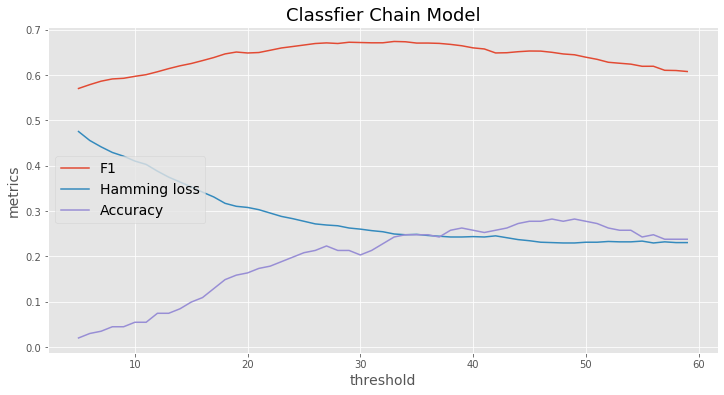

In [17]:
#for the next classifier we need to remove from y-train, y-test categories which equal 0 for all train samples
cc_classifier = ClassifierChain(LogisticRegression(solver='warn'))
cc_classifier.fit(X_train, y_train)
cc_predictions_proba = cc_classifier.predict_proba(X_test)
#for plotting metrics as a function of threashold
th = []
f = []
ham = []
ac = []
for t in range (5,60): # threshold value
    y_pred_new = (cc_predictions_proba >= t/100).astype(int)
#     print("t =" ,t/100)
#     print("Accuracy = ",accuracy_score(y_test,y_pred_new))
#     print("F1 = ",f1_score(y_test,y_pred_new, average="micro"))
#     print("Hamming loss = ",hamming_loss(y_test,y_pred_new))
    th.append(t)
    ac.append(accuracy_score(y_test,y_pred_new))
    f.append(f1_score(y_test,y_pred_new, average="micro"))
    ham.append(hamming_loss(y_test,y_pred_new))
plt.rcParams["figure.figsize"] = (12,6)
with plt.style.context('ggplot'):
    plt.plot(th, f)
    plt.plot(th, ham)
    plt.plot(th, ac)
    plt.legend(['F1', 'Hamming loss', 'Accuracy'], loc='center left', fontsize = 14)
    plt.ylabel("metrics", fontsize = 14)
    plt.xlabel("threshold", fontsize = 14)
    plt.title("Classfier Chain Model", fontsize = 18)
plt.show()

In [41]:

# using classifier chains
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(X_train, y_train)
# predict
predictions = classifier.predict(X_test)

# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,predictions.toarray())
Micro_Precision = precision_score(y_test,predictions, average='micro')
Micro_Recall = recall_score(y_test,predictions, average='micro')
Micro_F1 = f1_score(y_test,predictions, average='micro')
Micro_Average_Prec = average_precision_score(y_test.toarray(), predictions.toarray(), average='micro')
Macro_Precision = precision_score(y_test,predictions, average='macro')
Macro_Recall = recall_score(y_test,predictions, average='macro')
Macro_F1 = f1_score(y_test,predictions, average='macro')
Macro_Average_Prec = average_precision_score(y_test.toarray(), predictions.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test.toarray(), predictions.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test.toarray(), predictions.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,predictions)
Ranking_loss = label_ranking_loss(y_test.toarray(), predictions.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test.toarray(), predictions)
fpr, tpr, thresholds = roc_curve(y_test.toarray().ravel(), predictions.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test.toarray(), predictions.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test.toarray(), predictions.toarray())
Jaccard_score = jaccard_score(y_test, predictions, average='samples')
Jaccard_score_macro = jaccard_score(y_test, predictions, average='macro')
print("ClassifierChain Accuracy = ",Accuracy)
print("ClassifierChain Micro_Precision = ",Micro_Precision)
print("ClassifierChain Micro_Recall = ",Micro_Recall)
print("ClassifierChain Micro_F1 = ",Micro_F1)
print("ClassifierChain Micro_Average_Prec = ",Micro_Average_Prec)
print("ClassifierChain Macro_Precision = ",Macro_Precision)
print("ClassifierChain Macro_Recall = ",Macro_Recall)
print("ClassifierChain Macro_F1 = ",Macro_F1)
print("ClassifierChain Macro_Average_Prec = ",Macro_Average_Prec)
print("ClassifierChain Samples_Average_Prec = ",Samples_Average_Prec)
print("ClassifierChain Weighted_Average_Prec = ",Weighted_Average_Prec)
print("ClassifierChain Hamming_loss = ",Hamming_loss)
print("ClassifierChain Ranking_loss = ",Ranking_loss)
print("ClassifierChain Micro_Roc_auc = ",Micro_Roc_auc)
print("ClassifierChain Coverage_error = ",Coverage_error)
print("ClassifierChain label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("ClassifierChain Jaccard_score = ",Jaccard_score)
print("ClassifierChain Jaccard_score_macro = ",Jaccard_score_macro)
Eval6 = ['ClassifierChain',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval6)

ClassifierChain Accuracy =  0.27722772277227725
ClassifierChain Micro_Precision =  0.6578249336870027
ClassifierChain Micro_Recall =  0.6215538847117794
ClassifierChain Micro_F1 =  0.6391752577319588
ClassifierChain Micro_Average_Prec =  0.5334611017392998
ClassifierChain Macro_Precision =  0.6294129492064676
ClassifierChain Macro_Recall =  0.6087345168739831
ClassifierChain Macro_F1 =  0.6027356179024609
ClassifierChain Macro_Average_Prec =  0.5270264076081984
ClassifierChain Samples_Average_Prec =  0.632013201320132
ClassifierChain Weighted_Average_Prec =  0.5403466494587529
ClassifierChain Hamming_loss =  0.23102310231023102
ClassifierChain Ranking_loss =  0.446012101210121
ClassifierChain Micro_Roc_auc =  0.7314411489979562
ClassifierChain Coverage_error =  4.311881188118812
ClassifierChain label_ranking_average_precision_score =  0.6320132013201322
ClassifierChain Jaccard_score =  0.5181518151815181
ClassifierChain Jaccard_score_macro =  0.452497631177198


# 3.5. Multiple Binary Classifications - (One Vs Rest Classifier)


In [42]:
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),])
# Training logistic regression model on train data
LogReg_pipeline.fit(X_train,y_train )
# calculating test accuracy
Logprediction = LogReg_pipeline.predict(X_test)
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,Logprediction)
Micro_Precision = precision_score(y_test,Logprediction, average='micro')
Micro_Recall = recall_score(y_test,Logprediction, average='micro')
Micro_F1 = f1_score(y_test,Logprediction, average='micro')
Micro_Average_Prec = average_precision_score(y_test.toarray(), Logprediction, average='micro')
Macro_Precision = precision_score(y_test,Logprediction, average='macro')
Macro_Recall = recall_score(y_test,Logprediction, average='macro')
Macro_F1 = f1_score(y_test,Logprediction, average='macro')
Macro_Average_Prec = average_precision_score(y_test.toarray(), Logprediction, average='macro')
Samples_Average_Prec = average_precision_score(y_test.toarray(), Logprediction, average='samples')
Weighted_Average_Prec = average_precision_score(y_test.toarray(), Logprediction, average='weighted')
Hamming_loss = hamming_loss(y_test,Logprediction)
Ranking_loss = label_ranking_loss(y_test, Logprediction)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.toarray().ravel(), Logprediction.ravel())
Micro_Roc_auc = auc(fpr["micro"], tpr["micro"])
Coverage_error = coverage_error(y_test.toarray(), Logprediction)
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test.toarray(), Logprediction)
Jaccard_score = jaccard_score(y_test, Logprediction, average='samples')
Jaccard_score_macro = jaccard_score(y_test, Logprediction, average='macro')
print("OneVsRestClassifier_LogisticRegression Accuracy = ",Accuracy)
print("OneVsRestClassifier_LogisticRegression Micro_Precision = ",Micro_Precision)
print("OneVsRestClassifier_LogisticRegression Micro_Recall = ",Micro_Recall)
print("OneVsRestClassifier_LogisticRegression Micro_F1 = ",Micro_F1)
print("OneVsRestClassifier_LogisticRegression Micro_Average_Prec = ",Micro_Average_Prec)
print("OneVsRestClassifier_LogisticRegression Macro_Precision = ",Macro_Precision)
print("OneVsRestClassifier_LogisticRegression Macro_Recall = ",Macro_Recall)
print("OneVsRestClassifier_LogisticRegression Macro_F1 = ",Macro_F1)
print("OneVsRestClassifier_LogisticRegression Macro_Average_Prec = ",Macro_Average_Prec)
print("OneVsRestClassifier_LogisticRegression Samples_Average_Prec = ",Samples_Average_Prec)
print("OneVsRestClassifier_LogisticRegression Weighted_Average_Prec = ",Weighted_Average_Prec)
print("OneVsRestClassifier_LogisticRegression Hamming_loss = ",Hamming_loss)
print("OneVsRestClassifier_LogisticRegression Ranking_loss = ",Ranking_loss)
print("OneVsRestClassifier_LogisticRegression Micro_Roc_auc = ",Micro_Roc_auc)
print("OneVsRestClassifier_LogisticRegression Coverage_error = ",Coverage_error)
print("OneVsRestClassifier_LogisticRegression label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("OneVsRestClassifier_LogisticRegression Jaccard_score = ",Jaccard_score)
print("OneVsRestClassifier_LogisticRegression Jaccard_score_macro = ",Jaccard_score_macro)
Eval7 = ['OneVsRestClassifier_LogisticRegression',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval7)

OneVsRestClassifier_LogisticRegression Accuracy =  0.1188118811881188
OneVsRestClassifier_LogisticRegression Micro_Precision =  0.6787564766839378
OneVsRestClassifier_LogisticRegression Micro_Recall =  0.3283208020050125
OneVsRestClassifier_LogisticRegression Micro_F1 =  0.4425675675675675
OneVsRestClassifier_LogisticRegression Micro_Average_Prec =  0.44397198300218815
OneVsRestClassifier_LogisticRegression Macro_Precision =  0.5913243470050434
OneVsRestClassifier_LogisticRegression Macro_Recall =  0.3056387698211837
OneVsRestClassifier_LogisticRegression Macro_F1 =  0.3800616622373196
OneVsRestClassifier_LogisticRegression Macro_Average_Prec =  0.4317429899768595
OneVsRestClassifier_LogisticRegression Samples_Average_Prec =  0.4975247524752475
OneVsRestClassifier_LogisticRegression Weighted_Average_Prec =  0.44607185320244236
OneVsRestClassifier_LogisticRegression Hamming_loss =  0.2722772277227723
OneVsRestClassifier_LogisticRegression Ranking_loss =  0.7075357535753575
OneVsRestClas

In [44]:
df = pd.DataFrame(Evals, columns=['Classifier','Accuracy','Micro_Pre','Micro_Recall','Micro_F1','Micro_Avg_Prec',
         'Macro_Prec','Macro_Recall','Macro_F1','Macro_Avg_Prec','Samples_Avg_Prec','Weighted_Avg_Prec','Hamming_loss',
         'Ranking_loss','Micro_Roc_auc','Coverage_error','label_ranking_avg_prec_score','Jaccard_score','Jaccard_score_macro'])
df

Classifier  Accuracy  Micro_Pre  Micro_Recall  \
0                             BinaryReMLP  0.029703   0.401408      0.285714   
1                             BinaryReSVC  0.143564   0.658537      0.406015   
2                      BinaryReGaussianNB  0.163366   0.562387      0.779449   
3         LabelPowersetLogisticRegression  0.331683   0.642512      0.666667   
4                                   MLkNN  0.133663   0.550820      0.421053   
5                         ClassifierChain  0.277228   0.657825      0.621554   
6  OneVsRestClassifier_LogisticRegression  0.118812   0.678756      0.328321   

   Micro_F1  Micro_Avg_Prec  Macro_Prec  Macro_Recall  Macro_F1  \
0  0.333821        0.349837    0.298623      0.244916  0.174633   
1  0.502326        0.462920    0.606502      0.378121  0.442314   
2  0.653361        0.510959    0.563311      0.778815  0.650916   
3  0.654367        0.538077    0.644665      0.664118  0.647993   
4  0.477273        0.422518    0.510442      0.386286  0.426252   
5  0.639175        0.533461    0.629413      0.608735  0.602736   
6  0.442568        0.443972    0.591324      0.305639  0.380062   

   Macro_Avg_Prec  Samples_Avg_Prec  Weighted_Avg_Prec  Hamming_loss  \
0        0.338137          0.441144           0.356922      0.375413   
1        0.448853          0.562706           0.465925      0.264851   
2        0.517812          0.578424           0.530118      0.272277   
3        0.544562          0.641502           0.553845      0.231848   
4        0.414045          0.534791           0.435013      0.303630   
5        0.527026          0.632013           0.540347      0.231023   
6        0.431743          0.497525           0.446072      0.272277   

   Ranking_loss  Micro_Roc_auc  Coverage_error  label_ranking_avg_prec_score  \
0      0.751980       0.538306        5.628713                      0.441144   
1      0.609571       0.651347        5.158416                      0.562706   
2      0.424752       0.740893        4.014851                      0.578424   
3      0.418248       0.742312        4.039604                      0.641502   
4      0.618221       0.626270        5.118812                      0.534791   
5      0.446012       0.731441        4.311881                      0.632013   
6      0.707536       0.626030        5.316832                      0.497525   

   Jaccard_score  Jaccard_score_macro  
0       0.228713             0.119920  
1       0.373762             0.306236  
2       0.521535             0.489424  
3       0.542904             0.487825  
4       0.356601             0.289386  
5       0.518152             0.452498  
6       0.281766             0.253954

In [21]:
# Print the confusion matrix
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix
#print(multilabel_confusion_matrix(y_test, Logprediction))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, Logprediction))

              precision    recall  f1-score   support

           0       0.77      0.19      0.30        54
           1       0.00      0.00      0.00        59
           2       0.64      0.57      0.60        96
           3       0.70      0.53      0.60        59
           4       0.79      0.21      0.33        73
           5       0.65      0.34      0.45        58

   micro avg       0.68      0.33      0.44       399
   macro avg       0.59      0.31      0.38       399
weighted avg       0.60      0.33      0.40       399
 samples avg       0.40      0.32      0.34       399



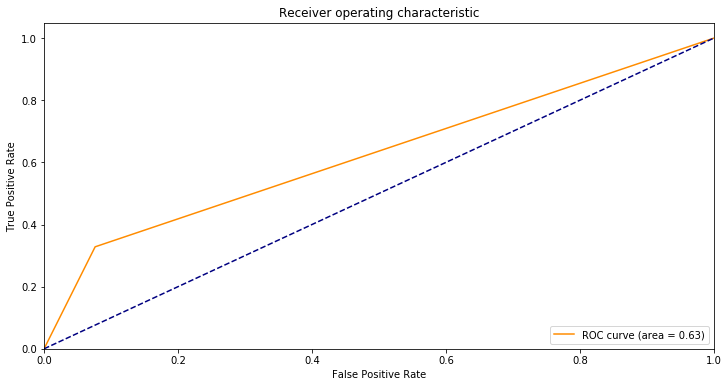

In [50]:
#https://www.programcreek.com/python/example/81207/sklearn.metrics.roc_curve
def print_roc(y_true, y_scores):
        '''
        Prints the ROC for this model.
        '''
        fpr, tpr, thresholds = roc_curve(y_test.toarray().ravel(), y_scores.ravel())
        auc_score = auc(fpr, tpr)
        
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)'% auc_score)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show() 
print_roc(y_test, Logprediction)

In [ ]:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

In [ ]:
https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()